In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import style
import pandas as pd
import numpy as np

import matplotlib as mpl
from scipy.stats import ttest_ind

In [10]:
res_df_sagittal = pd.read_pickle('./results/partial_align_benchmark_results/partial_alignment_sagittal2_res_df.pkl')
added_method = ['SPACEL', 'STAlign_wo_prealign', 'STAlign']
for m in added_method:
    alignment_results = np.load(f"./results/partial_align_benchmark_results/STARMap_sagittal2_{m}_partial_results.npy", allow_pickle=True)
    res_df_m = pd.DataFrame(alignment_results, columns=['mae', 'mae_var', 'mse', 'mse_var', 'overlay_ratio'])
    res_df_m['Method'] = m
    res_df_sagittal = pd.concat([res_df_sagittal, res_df_m], axis=0)
res_df_well = pd.read_pickle('./results/partial_align_benchmark_results/partial_alignment_well_08_res_df.pkl')
for m in added_method:
    alignment_results = np.load(f"./results/partial_align_benchmark_results/STARMap_well_08_{m}_partial_results.npy", allow_pickle=True)
    res_df_m = pd.DataFrame(alignment_results, columns=['mae', 'mae_var', 'mse', 'mse_var', 'overlay_ratio'])
    res_df_m['Method'] = m
    res_df_well = pd.concat([res_df_well, res_df_m], axis=0)


res_df_sagittal['Dataset'] = 'sagittal'
res_df_well['Dataset'] = 'well'

res_df = pd.concat([res_df_sagittal, res_df_well], axis=0)

In [7]:
my_palette = [np.array([157,60,135]) / 255] + sns.color_palette('Paired')[0:3]+sns.color_palette('Paired')[4:6]

In [18]:
res_df['Method'].astype('category').cat.categories

Index(['Moscot', 'PASTE', 'PASTE2', 'SLAT', 'SLAT_no_init', 'SPACEL',
       'STAlign', 'STAlign_wo_prealign', 'Spateo'],
      dtype='object')

In [20]:
# methods = ['Spateo', 'PASTE', 'PASTE2', 'Moscot_rigid', 'Moscot_nonrigid', 'SLAT','SLAT_GT','STAlign_wo_prealign', 'STAlign_prealign', 'SPACEL', 'GTRotation']
my_palette = [np.array([157,60,135]) / 255] + sns.color_palette('Paired')[0:3]+sns.color_palette('Paired')[4:6]+sns.color_palette('Paired')[6:8]+sns.color_palette('Paired')[11:12]

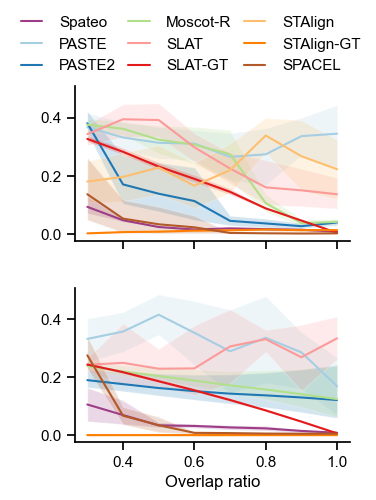

In [27]:
import matplotlib as mpl
sns.set_theme(style="ticks")
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams.update({'text.color' : COLOR,
                     'axes.labelcolor' : COLOR})

g = sns.relplot(
    data=res_df,
    x='overlay_ratio', 
    y="mae", 
    hue="Method", 
    row="Dataset",
    # col="Dataset",
    kind="line", 
    palette=my_palette,
    err_kws={'edgecolor': None},
    legend=True,
    height=2.3, 
    aspect=1.59, 
    facet_kws=dict(sharex=True,legend_out=False),
    hue_order=['Spateo','PASTE','PASTE2','Moscot','SLAT_no_init','SLAT','STAlign_wo_prealign', 'STAlign', 'SPACEL'],
)

handles, labels = g.axes[0,0].get_legend_handles_labels()
labels = ['Spateo','PASTE','PASTE2','Moscot-R','SLAT','SLAT-GT','STAlign', 'STAlign-GT', 'SPACEL']
g._legend.remove()
g.fig.legend(handles, labels, ncol=3, loc='upper center', 
                bbox_to_anchor=(0.51, 1.1), frameon=False, columnspacing=0.5,numpoints=10)

g.axes[0,0].spines['bottom'].set_color(COLOR)
g.axes[0,0].spines['top'].set_color(COLOR) 
g.axes[0,0].spines['right'].set_color(COLOR)
g.axes[0,0].spines['left'].set_color(COLOR)
g.axes[1,0].spines['bottom'].set_color(COLOR)
g.axes[1,0].spines['top'].set_color(COLOR) 
g.axes[1,0].spines['right'].set_color(COLOR)
g.axes[1,0].spines['left'].set_color(COLOR)

# leg = g._legend
# leg.set_bbox_to_anchor([0.5, 0.5])  # coordinates of lower left of bounding box
# leg._loc = 2
# leg.ncols=2

g.set_xlabels('Overlap ratio', color='black')
g.set_ylabels('', color='black')
g.set_titles('')
# g.add_legend(loc=9,ncol=2,fontsize=6,bbox_to_anchor=(0.4,2),title="")
# g.add_legend()
import os
plt.savefig('./figures/partial_align_benchmark/partial_align_benchmark.pdf', dpi=300, bbox_inches='tight', transparent=True)